## TP Neural Network

the first part of this session is to implement its own version of the perceptron and get more familiar with the practice of ML.

#### **Multiclass Perceptron**

In order to make your own perceptron, you will have to implement the following

  1. Define the __softmax__ function
  2. __PeceptronOut__ : return the output for each of the $K$ neurons.
  3. __UpdateWeights__ : update the weights of the perceptron for a mini-batch
  4. __OneHotVec__ : from a label and a number of possible class, it returns a vector with one on the correct class and zero elsewhere
  5. __TransformX__ : From the train set, return a new set by adding a component with the constant 1 for all data
  6. __ComputeScore__ : Return the number of correct classified samples

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def softmax(y):
    exp_y = np.exp(y)
    return exp_y / np.sum(exp_y,0)

In [4]:
def PerceptronOut(w, X):
    return softmax(np.matmul(w,X))

Update rule  

$$
  w_{ki}^{(t+1)} = w_{ki}^{(t)} +  \frac{\eta}{{\rm BS}}
 \sum_{m}  x_i^{(m)} \left( \tilde{y}_k^{(m)} - y(\vec{x}^{(m)})_k\right)
$$

In [5]:
# X should be D X n_mb , and y K X n_mb
def updateWeights(w,X,y_true,η=0.1):
    y = PerceptronOut(w,X) # K x n_mb
    w = w + η*(np.matmul(X,(y_true-y).T)/X.shape[1]).T
    return w

In [110]:
def OneHotVec(y,Nc):
    NS = y.shape[0]
    y_true = np.zeros((Nc,y.shape[0])) # true labels
    for i in range(NS):
        y_true[y[i],i] = 1
    return y_true

In [94]:
def normalize_X(train_s,Ns):
    un = np.ones((Ns,1))
    x = np.concatenate((un,train_s),axis=1)
    return x.T


In [95]:
def ComputeScore(w,X,y):
    pr = np.argmax(PerceptronOut(w,X),0)
    return np.sum(pr==y)/X.shape[1]

In [118]:
def ComputeLike(w,X,y):
    return np.mean(np.log(PerceptronOut(w,X))*y)*w.shape[0]

Now, check that your perceptron is working, you should reach ~0.98 of correct classification on the training set (and something similar on the test set).
  * Compare the likelihood function in order to define at which epoch the learning should be stopped
  * Check what are the worst classified images (wrongly classify image with the highest response.
  * Show what is the averaged images for each class (the average image of all the correctly classifier samples for a given class)

In [96]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

f = gzip.open('../../M1Pro-ML/mnist.pkl.gz', 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
p = u.load()
train_set, valid_set, test_set = p

In [120]:
Ns = 5000
X = normalize_X(train_set[0][:Ns,:],Ns)
Xtest = normalize_X(test_set[0],10000)
y = OneHotVec(train_set[1][:Ns],10)
ytest = OneHotVec(test_set[1][:10000],10)

In [121]:
# Full update
w = np.random.random((10,X.shape[0]))
for t in range(10):
    w = updateWeights(w,X,y,η=0.1)
    print("t=",t," score=",ComputeScore(w,X,train_set[1][:Ns]))
print("score=",ComputeScore(w,X,train_set[1][:Ns]))

t= 0  score= 0.117
t= 1  score= 0.1272
t= 2  score= 0.1446
t= 3  score= 0.1572
t= 4  score= 0.1714
t= 5  score= 0.1884
t= 6  score= 0.1992
t= 7  score= 0.215
t= 8  score= 0.2302
t= 9  score= 0.2482
score= 0.2482


In [122]:
# implement batches
def getMiniBatches(X,y,m,bs):
    return X[:,m*bs:(m+1)*bs],y[:,m*bs:(m+1)*bs]

In [123]:
# With mini-batch update
w = np.random.random((10,X.shape[0]))
bs = 20
NB = int(X.shape[1]/bs)
sc_train = np.array([])
sc_test = np.array([])
like_train = np.array([])
like_test = np.array([])
for t in range(50):
    for m in range(NB):
        Xb,yb = getMiniBatches(X,y,m,bs)
        w = updateWeights(w,Xb,yb,η=0.1)
    sc_train = np.append(sc_train,ComputeScore(w,X,train_set[1][:Ns]))
    sc_test = np.append(sc_test,ComputeScore(w,Xtest,test_set[1][:]))
    like_train = np.append(like_train,ComputeLike(w,X,y))
    like_test = np.append(like_test,ComputeLike(w,Xtest,ytest))
    print("t=",t," score=",ComputeScore(w,X,train_set[1][:Ns]))

t= 0  score= 0.8296
t= 1  score= 0.8738
t= 2  score= 0.8918
t= 3  score= 0.9054
t= 4  score= 0.9114
t= 5  score= 0.9174
t= 6  score= 0.922
t= 7  score= 0.9254
t= 8  score= 0.9292
t= 9  score= 0.932
t= 10  score= 0.9342
t= 11  score= 0.9372
t= 12  score= 0.9388
t= 13  score= 0.9418
t= 14  score= 0.9438
t= 15  score= 0.9446
t= 16  score= 0.9452
t= 17  score= 0.9472
t= 18  score= 0.9478
t= 19  score= 0.949
t= 20  score= 0.9498
t= 21  score= 0.9514
t= 22  score= 0.9524
t= 23  score= 0.9544
t= 24  score= 0.956
t= 25  score= 0.956
t= 26  score= 0.9572
t= 27  score= 0.9582
t= 28  score= 0.9592
t= 29  score= 0.9598
t= 30  score= 0.9604
t= 31  score= 0.9614
t= 32  score= 0.9616
t= 33  score= 0.962
t= 34  score= 0.9634
t= 35  score= 0.9644
t= 36  score= 0.9652
t= 37  score= 0.966
t= 38  score= 0.966
t= 39  score= 0.9666
t= 40  score= 0.9666
t= 41  score= 0.9666
t= 42  score= 0.9668
t= 43  score= 0.9676
t= 44  score= 0.9682
t= 45  score= 0.9686
t= 46  score= 0.969
t= 47  score= 0.9692
t= 48  scor

Now, check that your perceptron is working, you should reach ~0.98 of correct classification on the training set (and something similar on the test set).
  * Compare the likelihood function in order to define at which epoch the learning should be stopped
  * Check what are the worst classified images (wrongly classify image with the highest response)
  * Show what is the averaged images for each class (the average image of all the correctly classifier samples for a given class)

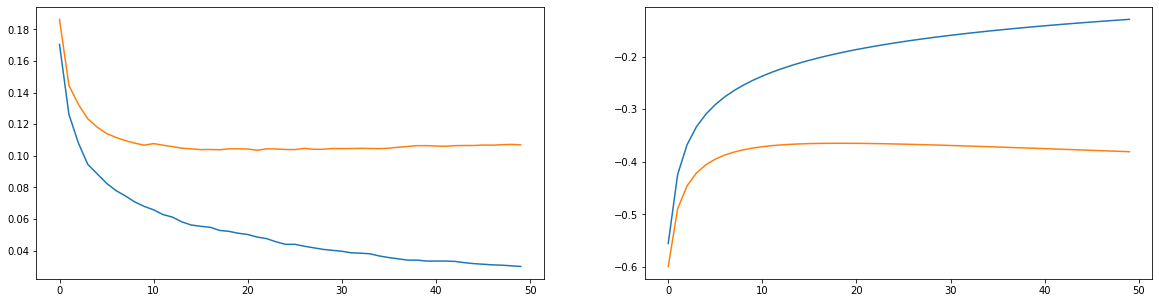

In [124]:
f,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].plot(1-sc_train)
ax[0].plot(1-sc_test)
ax[1].plot(like_train)
ax[1].plot(like_test)

8
2
7
7
1
6
5
9
2
1


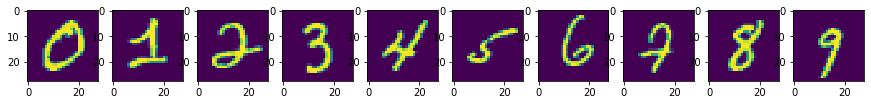

In [207]:
f, ax = plt.subplots(1,10,figsize=(15,5))
y_all = np.argmax(PerceptronOut(w,X),0)
for k in range(10):
    id_ = np.where(train_set[1][:Ns] == k)
    X_ = X[:,id_]
    Pout_ = PerceptronOut(w,X)[:,id_[0]]
    yout_ = y_all[id_[0]]
    wrong = Pout_[:,np.where(yout_!=k)[0]]
    Xwrong = X[:,id_[0]]

    id_max = np.where(np.max(wrong)==wrong)
    print(np.argmax(wrong[:,id_max[1][0]]))
    ax[k].imshow(Xwrong[1:,id_max[1][0]].reshape(28,28))


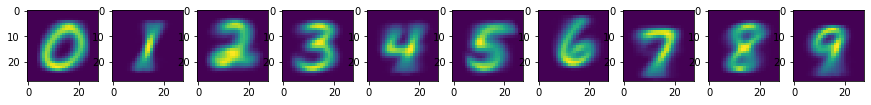

In [209]:
f,ax = plt.subplots(1,10,figsize=(15,5))
for k in range(10):
    id_ = np.where(train_set[1][:Ns] == k)
    X_ = X[:,id_[0]]
    mean_im = np.mean(X_[:,np.where(np.argmax(PerceptronOut(w,X)[:,id_[0]],0)==k)[0]],1)
    ax[k].imshow(mean_im[1:].reshape(28,28))

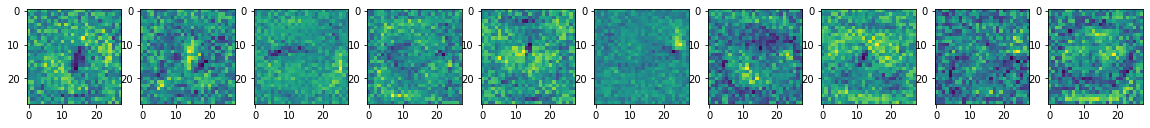

In [103]:
# visualizing the weights
f, ax = plt.subplots(1,10,figsize=(20,10))

for i in range(10):
    ax[i].imshow(w[i,1:].reshape(28,28))

Neural network can show strong weakness according to small but well-chosen pertubation. Let's consider the following loss function

$$
 \mathcal{L} = \left\| \vec{y}_{target} - \vec{y}(\vec{x}) \right\|^2
$$

where $\vec{y}_{target}$ is the targetted class (the one toward wish we want to bias the result. Now

  1. Compute the gradient w.r.t. the pixel images
  2. Implement the gradient and look at the effect of this gradient on a randomly generated image
  3. Look at the obtained images ... does it look like what you would expect ? 
  
It is possible to obtain even worst effect by considering the following loss which try to force the obtain image $\vec{x}$ to be as close as some chosen image

$$
 \mathcal{L} = \left\| \vec{y}_{target} - \vec{y}(\vec{x}) \right\|^2 + \lambda\left\| \vec{x}_{chosen} - \vec{x} \right\|^2
$$

where $\lambda$ is a parameter balancing between the two terms. Now 

  4. Implement the new gradient
  5. Test your gradient by choosing $\vec{y}_{target}$ to be a different class from $x_{chosen}$.

In [210]:
def UpdateClass(w,X,k,η=0.2):
    y_target = np.zeros(w.shape[0])
    y_target[k] = 1
    y_x = PerceptronOut(w,X)
    
    act = np.exp(np.matmul(w,X)) # C x NS
    Norm = np.sum(act,0)
    
    # grad = w/Norm - np.tensordot((act/(Norm**2)),np.sum(w*act.reshape(10,1),0),0)
    grad = w*(act.reshape(10,1))/Norm - np.tensordot((act/(Norm**2)),np.sum(w*act.reshape(10,1),0),0)
    
    X = X + η*np.matmul(grad.T,(y_target-y_x))
    return X

In [215]:
x = np.random.random(785)/100
k=7
for t in range(50):
    x = UpdateClass2(w,x,k,η=0.1)

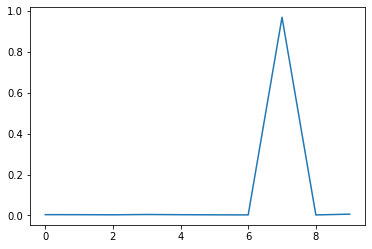

In [216]:
plt.plot(PerceptronOut(w,x))

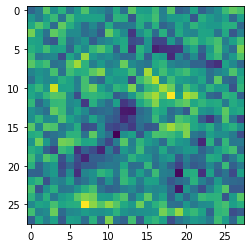

In [217]:
plt.imshow(x[1:].reshape(28,28))

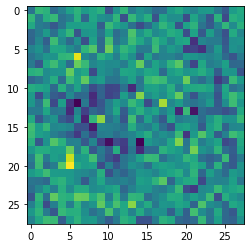

In [218]:
plt.imshow(w[3,1:].reshape(28,28))

In [219]:
def UpdateClass_withIm(w,X,xt,k,η=0.2,λ=0.1):
    y_target = np.zeros(w.shape[0])
    y_target[k] = 1
    y_x = PerceptronOut(w,X)
    
    act = np.exp(np.matmul(w,X)) # C x NS
    Norm = np.sum(act,0)
    
    grad = w*(act.reshape(10,1))/Norm - np.tensordot((act/(Norm**2)),np.sum(w*act.reshape(10,1),0),0)

    X = X + η*np.matmul(grad.T,(y_target-y_x)) - η*λ*(X-xt)
    return X

In [254]:
x = np.random.random(785)/100
for t in range(20):
    x = UpdateClass3(w,x,X[:,0],2,η=0.1,λ=0.12)

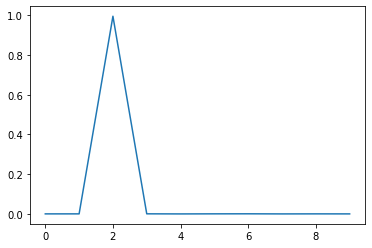

In [255]:
PerceptronOut(w,x)
plt.plot(np.arange(0,10),PerceptronOut(w,x))

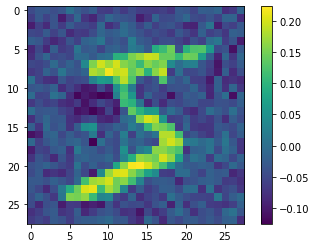

In [256]:
plt.imshow(x[1:].reshape(28,28))
plt.colorbar()